In [31]:
from regression import add_neighborhood_feature, avg_loss, SGD, sigmoid
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap, BoundaryNorm

In [32]:
training_data = np.load('1k_data/data.npy')
training_labels = np.load('1k_data/labels.npy')
testing_data = np.load('Task1_Testset500/data.npy')
testing_labels = np.load('Task1_Testset500/labels.npy')

In [33]:
def add_polynomial_features(X, degree):
    """Add polynomial features to the input data."""
    features = [X]
    for d in range(2, degree + 1):
        features.append(X**d)
    return np.concatenate(features, axis=1)

def feed_forward(data,labels, num_iters = 10000):
    # Adding in a bias term
    bias = np.ones((data.shape[0], 1))
    data = np.concatenate((data, bias), axis=1)
    # print(data.shape)
    samples,features = data.shape
    loss_coords, accuracy_coords = [], []
    w = np.random.rand(features)*2 - np.ones(shape=features) #[0,1] -> [-1,1]
    for i in range(num_iters):
        index = np.random.randint(0, 1000)
        x = data[index]
        y = labels[index][0]
        loss = SGD(w, x, y, alpha=0.01)
        if i % 1000 == 0:
            loss_coords.append(avg_loss(data,w,labels))
            accuracy_coords.append(accuracy(data,labels,w))
        
    print(f'Average Loss: {avg_loss(data,w,labels)}, Accuracy on testing set: {accuracy(data, labels, w)}')
    return (loss_coords, accuracy_coords)

def accuracy(data, labels, weights):
    # print(data.shape)
    outs = sigmoid(np.dot(data, weights))
    binary = np.array((outs >= 0.5).astype(int))
    samples = data.shape[0]
    correct = np.sum(np.equal(binary,labels[:,0]))
    return correct/samples

Average Loss: 7.149526713746546, Accuracy on testing set: 0.793


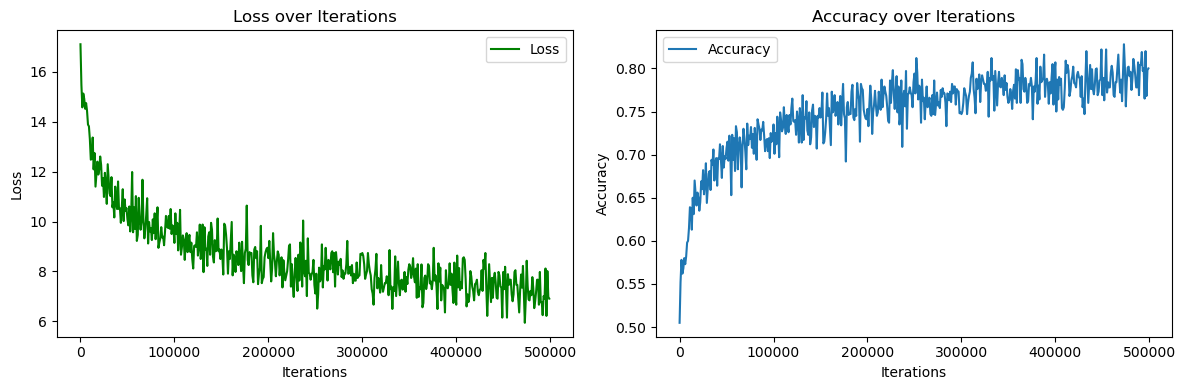

In [34]:
data = add_neighborhood_feature(training_data)
data = add_polynomial_features(data, degree=4)
loss_coords, accuracy_coords = feed_forward(data, training_labels, num_iters=500000)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
x_vals = list(range(0,500000,1000))
axs[0].plot(x_vals, loss_coords, label='Loss', color='green')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss over Iterations')
axs[0].legend()
axs[1].plot(x_vals, accuracy_coords, label='Accuracy')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy over Iterations')
axs[1].legend()
plt.tight_layout()
plt.show()
# update with actual testing data

In [35]:
# now we add these same data features to our testing data
# tdata = add_neighborhood_feature(testing_data)
# tdata = add_polynomial_features(tdata, degree=3)
# np.column_stack
# tloss = avg_loss(tdata, weights, testing_labels)
# tacc = accuracy(tdata, testing_labels, weights)
# print(f'testing loss:{tloss}, testing accuracy: {tacc}')